In [1]:
from itertools import repeat, product
from collections import defaultdict
from sys import version
print(version)

def read(fname):
    from scipy.io import loadmat
    file = loadmat(fname)
    arr  = file['A']
    return arr

def AdjDecomposition(adj):
    num, _ = adj.shape
    nodes  = {*range(num)}
    edges  = {(u, v, adj[u, v]) for u, v in product(nodes, repeat=2) if adj[u, v] != 0}
    return {'nodes':nodes, 'edges':edges}

3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]


**1. Bellman-Ford shortest path algorithm [20%]**

In [2]:
def BellmanFordAlgo(G, S):
    V, E = AdjDecomposition(G).values()
    assert S in V, f'The graph does not have the starting vertex `{S}`'
    
    # Step 1: initialize graph
    D = {v: (float('inf'), None) if v != S else (0, None) for v in V}
    C = len(V) - 1
    
    #Step 2: relax edges repeatedly
    for _ in repeat(None, C):
        for (e1, e2, w) in E:
            (d1, _), (d2, _) = D[e1], D[e2]
            if d2 > d1 + w: D[e2] = (d1 + w, e1)
                
    # Step 3: check for negative-weight cycles
    for (e1, e2, w) in E:
        (d1, _), (d2, _) = D[e1], D[e2]
        if d2 > d1 + w: raise ValueError('Graph contains negative weight cycle')    
    
    return D

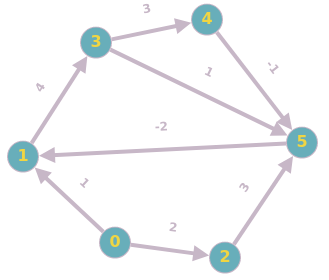

In [3]:
adj = read('Exercise_1_data/adjacencyMatrix.mat')
src = 4
res = BellmanFordAlgo(adj, src)

from tabulate import tabulate
# SP: Shortest path length
# PV: Previous vertex
print(tabulate([(src, dst, dist, prev) for dst, (dist, prev) in res.items()], 
               ['FROM', 'TO', 'SP', 'PV'], tablefmt='fancy_grid'))

╒════════╤══════╤══════╤══════╕
│   FROM │   TO │   SP │   PV │
╞════════╪══════╪══════╪══════╡
│      4 │    0 │  inf │      │
├────────┼──────┼──────┼──────┤
│      4 │    1 │   -3 │    5 │
├────────┼──────┼──────┼──────┤
│      4 │    2 │  inf │      │
├────────┼──────┼──────┼──────┤
│      4 │    3 │    1 │    1 │
├────────┼──────┼──────┼──────┤
│      4 │    4 │    0 │      │
├────────┼──────┼──────┼──────┤
│      4 │    5 │   -1 │    4 │
╘════════╧══════╧══════╧══════╛


**2. Global effciency, diffusion effciency and graph morphospace [40%]**

In [10]:
def globalEffciency(W):
    V, E  = AdjDecomposition(W).values()
    N     = len(V)
    Eglob = sum([1 / w for (e1, e2, w) in E if e1 != e2]) / (N ** 2 - N)
    return Eglob

def diffusionEfficiency(W):
    V, E = AdjDecomposition(W).values()
    P    = W / W.sum(axis=1).reshape(-1,1)
    # https://gtagency.github.io/lectures
    # https://graphonline.ru/en/#

In [20]:
import numpy as np
with np.printoptions(precision=2):
    print(adj / adj.sum(axis=1).reshape(-1,1))

[[ 0.    0.33  0.67  0.    0.    0.  ]
 [ 0.    0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    0.    0.75  0.25]
 [-0.   -0.   -0.   -0.   -0.    1.  ]
 [-0.    1.   -0.   -0.   -0.   -0.  ]]


In [9]:
adj.sum(axis=0) + adj.sum(axis=1)

array([3, 3, 5, 8, 2, 1])

array([ 3,  4,  3,  4, -1, -2])

In [8]:
adj

array([[ 0,  1,  2,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  0,  0, -1],
       [ 0, -2,  0,  0,  0,  0]], dtype=int16)